In [1]:
# performing not operation
def NOT(c):
    if c==0:
        c=1
    else:
        c=0
    return c
#performing opertion multibit full adder using C-cell logic
def adder(a,b,c,j):
    su=[]
    for i in range(len(a1)-1,-1,-1):
        s0=int(a[i],2)|int(b[i],2)
        s1=int(a[i],2)&int(b[i],2)
        if j==i:
            if s0==0:
                s0=1
            else:
                s0=0
      #print(s0)
      #print(s1)
        s=[]
        s.append(s0)
        s.append(s1)
      #print(s)
        s = ''.join(str(e) for e in s)
        if(s=="00" or s=='11'):
            sum1=c
            if(s=="00"):
                carry=0
            if(s=="11"):
                carry=1
            su.append(sum1)
        if(s=="01" or s=='10'):
            sum1=NOT(c)
            carry=c
            su.append(sum1)
        c=carry
    su.append(c)
    su.reverse()#applying reverse function to original result in list
    return su
#multi full-adder funtion
def add_binary_nums(x,y):
        max_len = max(len(x), len(y))
        x = x.zfill(max_len)
        y = y.zfill(max_len)
        result = ''
        carry = 0
        for i in range(max_len-1, -1, -1):
            r = carry
            r += 1 if x[i] == '1' else 0
            r += 1 if y[i] == '1' else 0
            result = ('1' if r % 2 == 1 else '0') + result
            carry = 0 if r < 2 else 1      
        if carry !=0 : result = '1' + result
        return result.zfill(max_len)
#inputs
A=int(input("Enter first input bit:"))
B=int(input("Enter second input bit:"))
N=A+B
c=int(input("Enter carry-in:"),2)
a=(bin(A)[2:])
b=(bin(B)[2:])
print(len(a))
print(len(b))
max_len = max(len(a), len(b))
print(max_len)
a= a.zfill(max_len)
b= b.zfill(max_len)
a1=[]
for i in range(len(a)):
    a1.append(a[i])
print(a1)
b1=[]
for i in range(len(b)):
    b1.append(b[i])
print(b1)
su=[]
carry=[]
su1=''
#performing full adder operation using function on given inputs to cross-verify with final result
n=add_binary_nums(a,b)
print(n)
ERR_bit=[]
Act_bit=[]
ACT_dec=[]
err_dec=[]
Diff=[]
Err_pcnt=[]
#performing opertion  for injecting error in multibit full adder using C-cell logic
for i in range(len(a1)-1,-1,-1):
    j=int(input("enter error at position:"))
    su=adder(a1,b1,c,j)    
    Result=''.join([str(ele) for ele in su])#converting list to string
    print(Result)
    dec_res=int(Result,2)
    print(dec_res)
    diff=N-dec_res
    err_pct=(diff/N)*100
    print("Difference between original_result and error_result:",diff)
    print("Error Percentage:",err_pct)
    ERR_bit.append(Result)
    Act_bit.append(n)
    Diff.append(diff)
    ACT_dec.append(N)
    err_dec.append(dec_res)
    Err_pcnt.append(err_pct) 

Enter first input bit:182
Enter second input bit:255
Enter carry-in:0
8
8
8
['1', '0', '1', '1', '0', '1', '1', '0']
['1', '1', '1', '1', '1', '1', '1', '1']
110110101
enter error at position:7
110110100
436
Difference between original_result and error_result: 1
Error Percentage: 0.2288329519450801
enter error at position:6
110110011
435
Difference between original_result and error_result: 2
Error Percentage: 0.4576659038901602
enter error at position:5
110110001
433
Difference between original_result and error_result: 4
Error Percentage: 0.9153318077803204
enter error at position:4
110101101
429
Difference between original_result and error_result: 8
Error Percentage: 1.8306636155606408
enter error at position:3
110100101
421
Difference between original_result and error_result: 16
Error Percentage: 3.6613272311212817
enter error at position:2
110010101
405
Difference between original_result and error_result: 32
Error Percentage: 7.322654462242563
enter error at position:1
101110101
373

In [2]:
import pandas as pd   
  
     
ERR_bit=ERR_bit
Act_bit=Act_bit
ACT_pro=ACT_dec
Err_pro=err_dec
Diff=Diff
Err_pcnt=Err_pcnt
     
# dictionary of lists   
dict = {'original_value': ACT_dec,'original_bit':Act_bit,'Error_value':Err_pro,'Error_bit':err_dec, 'Diff b/w org & err': Diff,'errorpercentage':Err_pcnt}   
       
df = pd.DataFrame(dict)  
    
# saving the dataframe  
df.to_csv('ccell_bit4_s2.csv')  

In [3]:
print(df)

   original_value original_bit  Error_value  Error_bit  Diff b/w org & err  \
0             437    110110101          436        436                   1   
1             437    110110101          435        435                   2   
2             437    110110101          433        433                   4   
3             437    110110101          429        429                   8   
4             437    110110101          421        421                  16   
5             437    110110101          405        405                  32   
6             437    110110101          373        373                  64   
7             437    110110101          309        309                 128   

   errorpercentage  
0         0.228833  
1         0.457666  
2         0.915332  
3         1.830664  
4         3.661327  
5         7.322654  
6        14.645309  
7        29.290618  


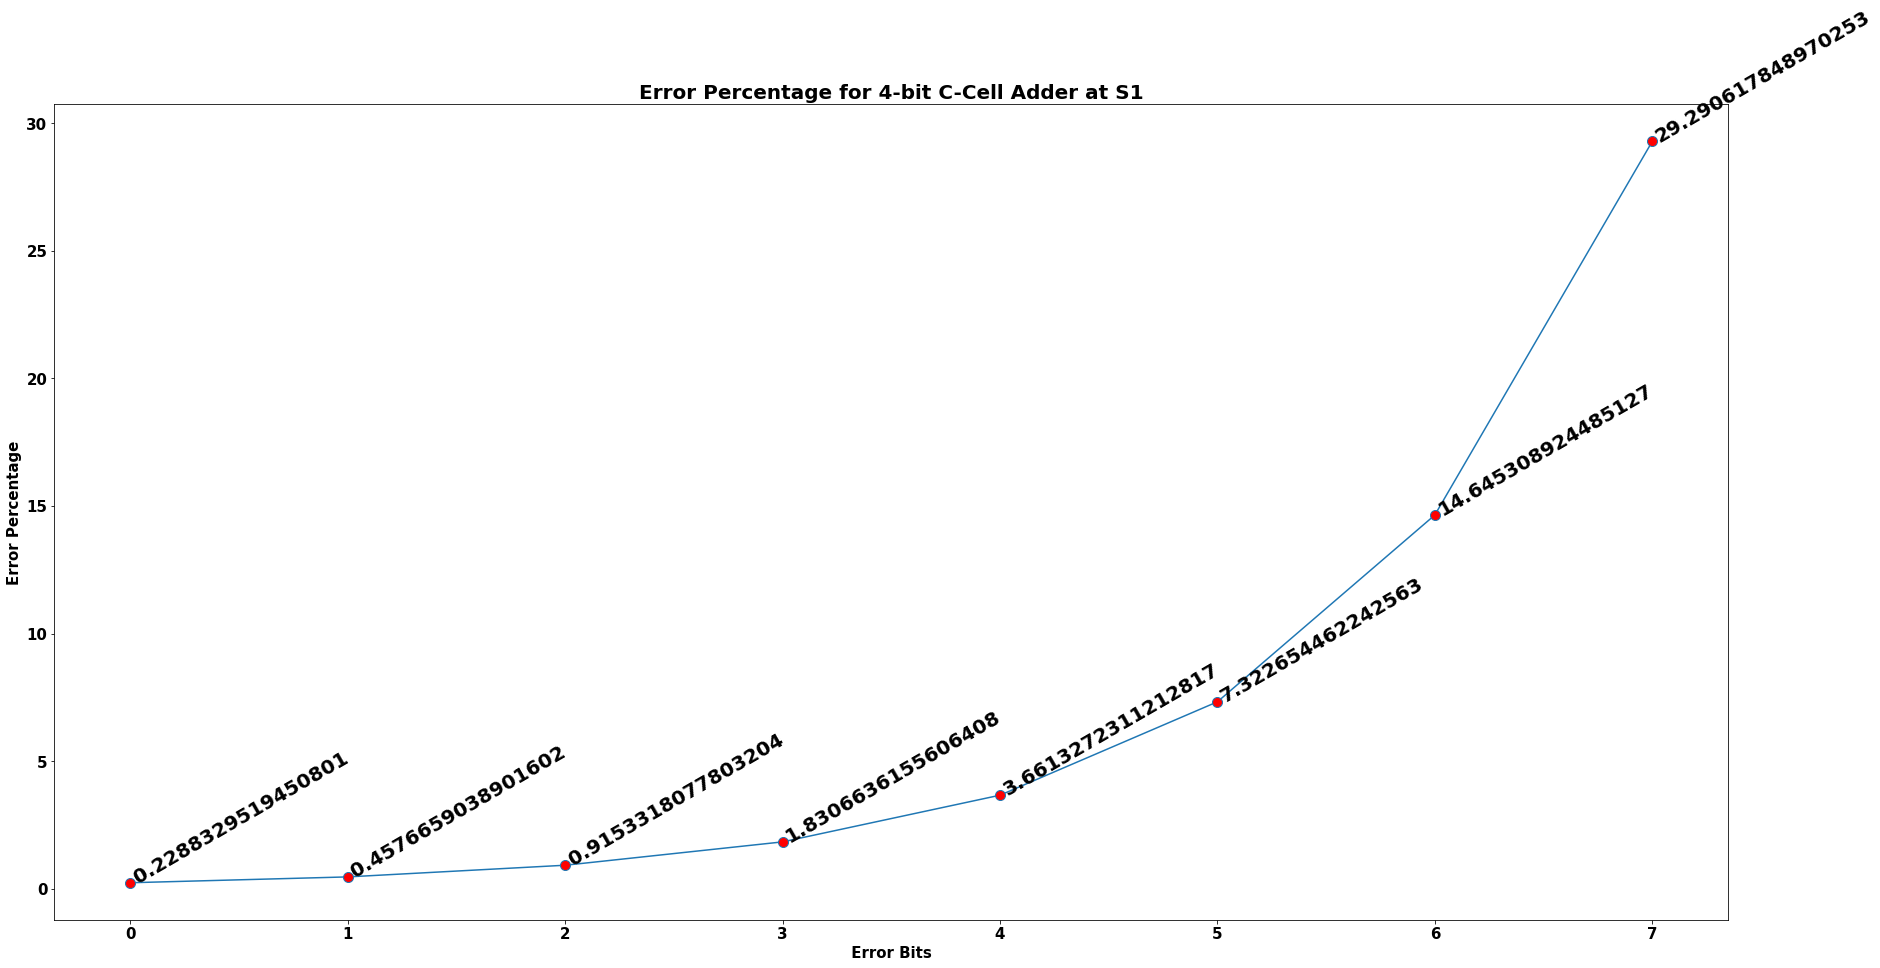

In [4]:
import matplotlib.pyplot as plt
import numpy as np
y=  Err_pcnt
diff_label = Diff
x = np.arange(len(diff_label))
fig, ax = plt.subplots(figsize=(30, 15))
plt.xticks(x,fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')
plt.xlabel(' Error Bits ', fontsize=15,weight='bold')
plt.ylabel('Error Percentage', fontsize=15,weight='bold')
plt.title('Error Percentage for 4-bit C-Cell Adder at S1',fontsize=20,weight='bold')
for a,b in zip(x, y): 
    plt.text(a, b, str(b),rotation=30,fontsize=20,weight='bold')
plt.plot(x,y,marker='o',mfc='red',ms='10')

Error injection in S1 select line

In [1]:
# performing not operation
def NOT(c):
    if c==0:
        c=1
    else:
        c=0
    return c
#performing opertion multibit full adder using C-cell logic
def adder(a,b,c,j):
    su=[]
    for i in range(len(a1)-1,-1,-1):
        s0=int(a[i],2)|int(b[i],2)
        s1=int(a[i],2)&int(b[i],2)
        if j==i:
            if s1==0:
                s1=1
            else:
                s1=0
      #print(s0)
      #print(s1)
        s=[]
        s.append(s0)
        s.append(s1)
      #print(s)
        s = ''.join(str(e) for e in s)
        if(s=="00" or s=='11'):
            sum1=c
            if(s=="00"):
                carry=0
            if(s=="11"):
                carry=1
            su.append(sum1)
        if(s=="01" or s=='10'):
            sum1=NOT(c)
            carry=c
            su.append(sum1)
        c=carry
    su.append(c)
    su.reverse()#applying reverse function to original result in list
    return su
#multi full-adder funtion
def add_binary_nums(x,y):
        max_len = max(len(x), len(y))
        x = x.zfill(max_len)
        y = y.zfill(max_len)
        result = ''
        carry = 0
        for i in range(max_len-1, -1, -1):
            r = carry
            r += 1 if x[i] == '1' else 0
            r += 1 if y[i] == '1' else 0
            result = ('1' if r % 2 == 1 else '0') + result
            carry = 0 if r < 2 else 1      
        if carry !=0 : result = '1' + result
        return result.zfill(max_len)
#inputs
A=int(input("Enter first input bit:"))
B=int(input("Enter second input bit:"))
c=int(input("Enter carry-in:"),2)
N=A+B
a=(bin(A)[2:])
b=(bin(B)[2:])
print(len(a))
print(len(b))
max_len = max(len(a), len(b))
print(max_len)
a= a.zfill(max_len)
b= b.zfill(max_len)
a1=[]
for i in range(len(a)):
    a1.append(a[i])
print(a1)
b1=[]
for i in range(len(b)):
    b1.append(b[i])
print(b1)
su=[]
carry=[]
su1=''
#performing full adder operation using function on given inputs to cross-verify with final result
n=add_binary_nums(a,b)
print(n)
ERR_bit=[]
Act_bit=[]
ACT_dec=[]
err_dec=[]
Diff=[]
Err_pcnt=[]
#performing opertion  for injecting error in multibit full adder using C-cell logic
for i in range(len(a1)-1,-1,-1):
    j=int(input("enter error at position:"))
    su=adder(a1,b1,c,j)    
    Result=''.join([str(ele) for ele in su])#converting list to string
    print(Result)
    dec_res=int(Result,2)
    print(dec_res)
    diff=N-dec_res
    err_pct=(diff/N)*100
    print("Difference between original_result and error_result:",diff)
    print("Error Percentage:",err_pct)
    ERR_bit.append(Result)
    Act_bit.append(n)
    Diff.append(diff)
    ACT_dec.append(N)
    err_dec.append(dec_res)
    Err_pcnt.append(err_pct) 

Enter first input bit:12
Enter second input bit:13
Enter carry-in:0
4
4
4
['1', '1', '0', '0']
['1', '1', '0', '1']
11001
enter error at position:3
11010
26
Difference between original_result and error_result: -1
Error Percentage: -4.0
enter error at position:2
11011
27
Difference between original_result and error_result: -2
Error Percentage: -8.0
enter error at position:1
10101
21
Difference between original_result and error_result: 4
Error Percentage: 16.0
enter error at position:0
10001
17
Difference between original_result and error_result: 8
Error Percentage: 32.0


In [2]:
import pandas as pd   
  
     
ERR_bit=ERR_bit
Act_bit=Act_bit
ACT_pro=ACT_dec
Err_pro=err_dec
Diff=Diff
Err_pcnt=Err_pcnt
     
# dictionary of lists   
dict = {'original_value': ACT_dec,'original_bit':Act_bit,'Error_value':Err_pro,'Error_bit':err_dec, 'Diff b/w org & err': Diff,'errorpercentage':Err_pcnt}   
       
df = pd.DataFrame(dict)  
    
# saving the dataframe
df.to_csv('ccell_bit8-s7.csv')  

In [3]:
print(df)

   original_value original_bit  Error_value  Error_bit  Diff b/w org & err  \
0              25        11001           26         26                  -1   
1              25        11001           27         27                  -2   
2              25        11001           21         21                   4   
3              25        11001           17         17                   8   

   errorpercentage  
0             -4.0  
1             -8.0  
2             16.0  
3             32.0  


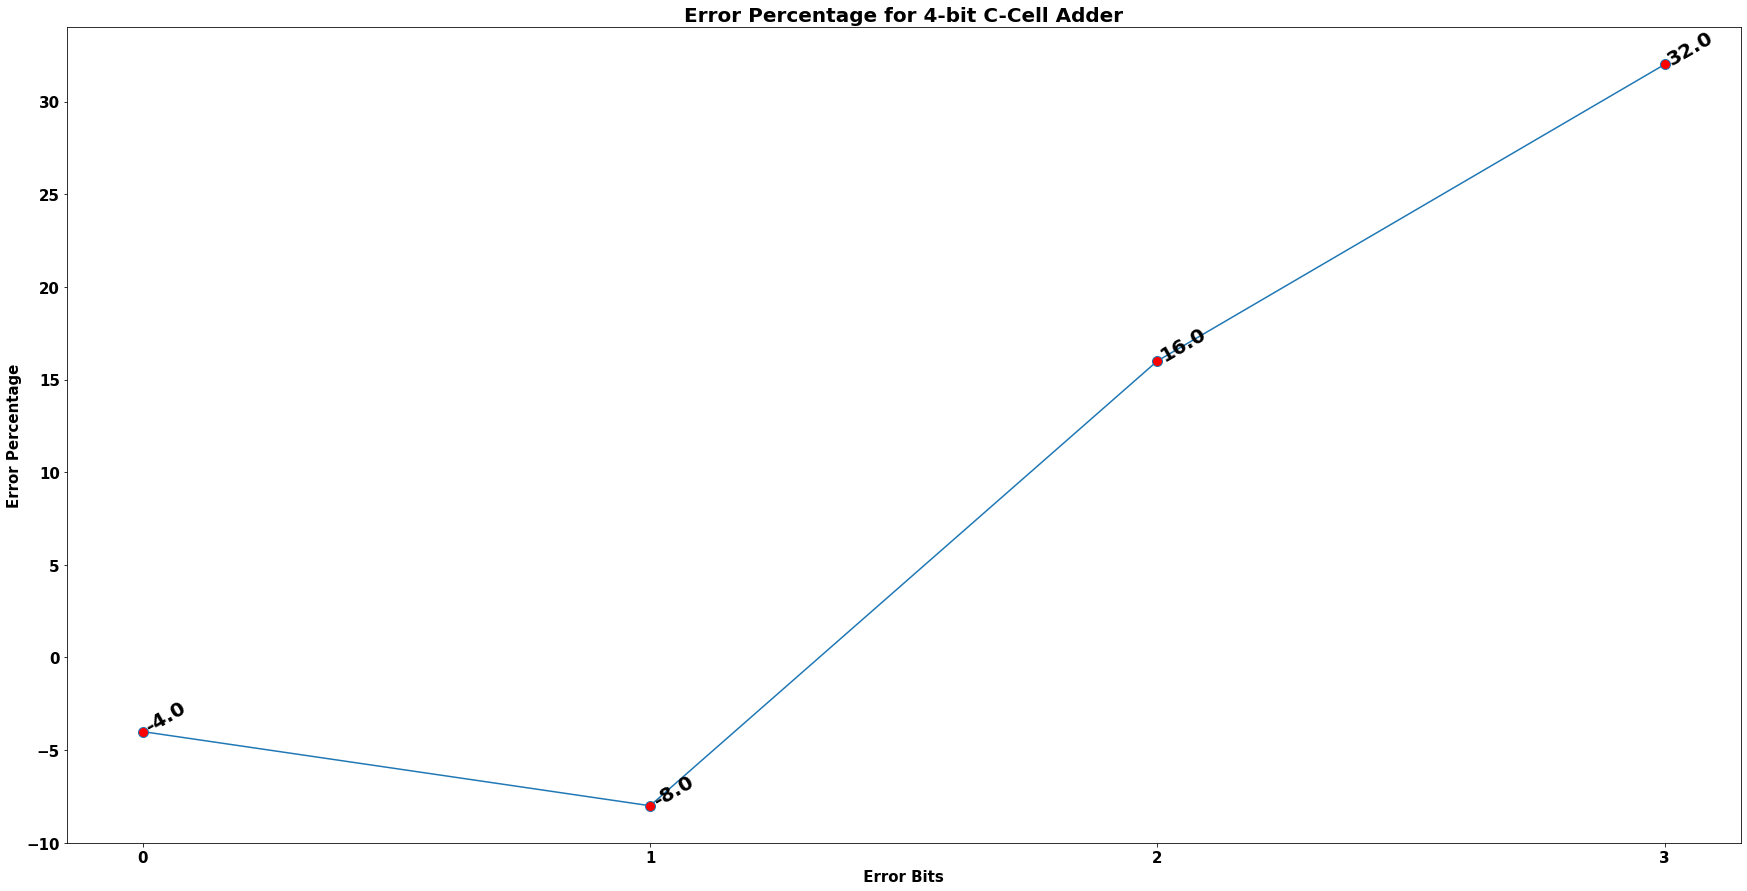

In [4]:
import matplotlib.pyplot as plt
import numpy as np
y=  Err_pcnt
diff_label = Diff
x = np.arange(len(diff_label))
fig, ax = plt.subplots(figsize=(30, 15))
plt.xticks(x,fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')
plt.xlabel(' Error Bits ', fontsize=15,weight='bold')
plt.ylabel('Error Percentage', fontsize=15,weight='bold')
plt.title('Error Percentage for 4-bit C-Cell Adder',fontsize=20,weight='bold')
for a,b in zip(x, y): 
    plt.text(a, b, str(b),rotation=30,fontsize=20,weight='bold')
plt.plot(x,y,marker='o',mfc='red',ms='10')